## Model Isinga - symulacja Monte Carlo

projekt zaliczeniowy

Założenia: brak

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scienceplots
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

plt.style.use(['science','notebook', 'grid'])

In [135]:
def get_random_lattice(N=20):
    ''' generowanie stanu początkowego układu z N^2 spinami '''
    
    lattice = 2*np.random.randint(2, size=(N,N))-1
    plt.imshow(lattice, interpolation='nearest', cmap=cm.gray)

    return lattice, N

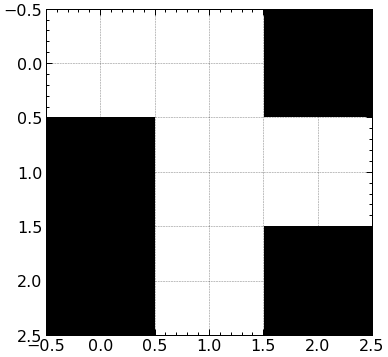

In [154]:
lattice, N = get_random_lattice(3)

In [165]:
# def get_energy(lattice):
#     kernal = generate_binary_structure(2,1)
#     kernal[1][1] = False
    
#     return (-lattice*convolve(lattice, kernal, mode='constant', cval=0))

# def get_total_energy(lattice):
#     return get_energy(lattice).sum()/2.


# utożsamiaamy płaszczyznę z torusem:
def get_energy(state, J=1):
    '''Energia układu w danym stanie, spiny jedynie oddziałyywują w pierwszej strefie kordynacyjnej'''
    energy = 0
    lattice_energy = np.zeros(state.shape)
    for i in range(len(state)):
        for j in range(len(state)):
            S = state[i,j]
            nb = state[(i+1)%N, j] + state[i,(j+1)%N] + state[(i-1)%N, j] + state[i,(j-1)%N]
            energy += -J*nb*S
            lattice_energy[i,j] = -J*nb*S
    return energy/4., lattice_energy

get_energy(lattice)

(1.0,
 array([[ 2., -2.,  2.],
        [ 2., -2.,  2.],
        [ 0.,  0.,  0.]]))

In [169]:
def get_magnetization(state):
    return np.sum(state)

In [ ]:
#  Metropolis algorithm for simulation
# goal: make an animation of MC ising model stabilization